# **Lab**: Data Wrangling (The process of converting raw data into a usable form) 
## **Nội dung**: Tích hợp dữ liệu từ nhiều nguồn bằng Pandas 
## **Mục tiêu**: Xây dựng bảng dữ liệu (data frame) dựa trên quá trình trộn dữ liệu từ nhiều tập tin. 
## **Bài toán**: Hãy phân tích thói quen sử dụng điện thoại di động dựa trên các nhãn hàng

- Dữ liệu đầu vào: 
    - Bảng thietbi: cho biết danh sách các thiết bị 
    - Bảng nguoidung_thietbi: cho biết danh sách người dùng đang sở hữu thiết bị 
    - Bảng nguoidung_sudung: cho biết danh sách quá trình người dùng dùng thiết bị 

- Yêu cầu dữ liệu đầu ra:  
    - Hãy tổng hợp dữ liệu thành bảng dữ liệu mới bao gồm các cột sau để phục vụ phân   tích dữ liệu 
    - outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Brand
ing,Model 

***Gợi ý**: Sinh viên suy nghĩ về sơ đồ quan hệ của các tập tin dữ liệu (xem mỗi tập tin là một bảng 
dữ liệu). Sau đó, sinh viên bắt đầu xử lý dữ liệu như hướng dẫn bên dưới

In [82]:
import pandas as pd

1. Đọc dữ liệu lên dataframe 

In [83]:
thiet_bi = pd.read_csv('week02/thietbi.csv')
nguoidung_thietbi = pd.read_csv('week02/nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('week02/nguoidung_sudung.csv')

In [84]:
thiet_bi.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [85]:
nguoidung_thietbi.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [86]:
nguoidung_sudung.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


2. Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên

3. Đổi tên các cột dữ liệu cần thiết

In [87]:
thiet_bi.rename(
    columns={"Retail Branding": "Branding", "Marketing Name": "MarketingName"},
    inplace=True,
)

4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb, use_id, platform, device]

In [88]:
dfKetQua = pd.merge(
    nguoidung_sudung, nguoidung_thietbi[["use_id", "platform", "device"]], on="use_id"
)

In [89]:
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


Hoặc dùng left-join tùy theo nhu cầu

In [90]:
# left-join
dfKetQua = pd.merge(
    nguoidung_sudung, nguoidung_thietbi[["use_id", "platform", "device"]], on="use_id", how="left"
)

In [91]:
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên

In [92]:
# inner-join
dfKetQua = pd.merge(
    dfKetQua, thiet_bi[["Branding", "Model"]], left_on="device", right_on="Model"
)

# left-join
# dfKetQua = pd.merge(
#     dfKetQua,
#     thiet_bi[["Branding", "Model"]],
#     left_on="device",
#     right_on="Model",
#     how="left",
# )

In [93]:
dfKetQua.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT

In [94]:
dfKetQua[dfKetQua['device'].str.startswith('GT')].head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
sử dụng của các nhãn hàng

In [95]:
dfKetQua.groupby("Branding").agg({
    "outgoing_mins_per_month": 'mean',
    "outgoing_sms_per_month": 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


8. Trực quan số lượng người dùng các nhãn hàng

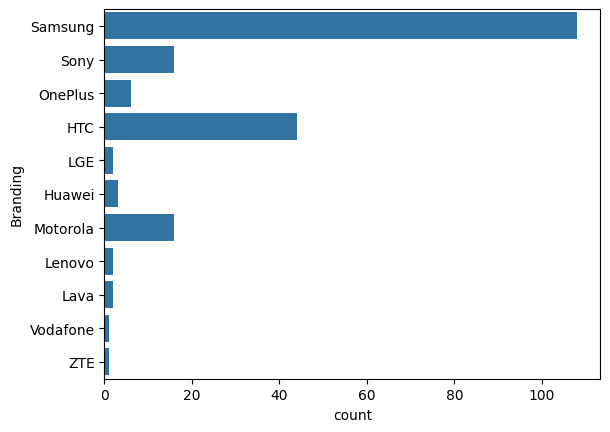

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dfKetQua, y='Branding')
plt.show()

9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
từng nhóm nhãn hàng bán lẻ 


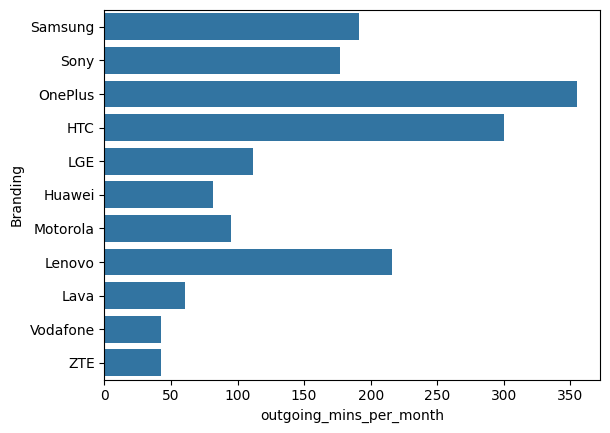

In [105]:
import numpy as np
sns.barplot(data=dfKetQua, y="Branding", x="outgoing_mins_per_month", estimator=np.mean, errorbar=None)
plt.show()

10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng 

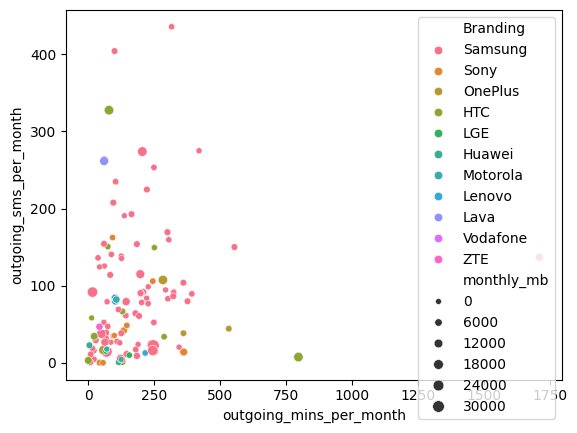

In [107]:
sns.scatterplot(x="outgoing_mins_per_month", y="outgoing_sms_per_month", hue="Branding", data=dfKetQua, size="monthly_mb")
plt.show()

In [110]:
from scipy import stats

11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút 


In [111]:
t_stat, p_value = stats.ttest_1samp(dfKetQua["outgoing_mins_per_month"], 200)

# Kết quả
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 200 phút.")
else:
    print("Không đủ bằng chứng để bác bỏ H0: Trung bình có thể bằng 200 phút.")

T-statistic: 0.3678
P-value: 0.7134
Không đủ bằng chứng để bác bỏ H0: Trung bình có thể bằng 200 phút.


12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn 


In [112]:
t_stat, p_value = stats.ttest_1samp(dfKetQua["outgoing_sms_per_month"], 100)

# Kết quả
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 100 tin nhắn.")
else:
    print("Không đủ bằng chứng để bác bỏ H0: Trung bình có thể bằng 100 tin nhắn.")

T-statistic: -2.9567
P-value: 0.0035
Bác bỏ giả thuyết H0: Trung bình không bằng 100 tin nhắn.


13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb 


In [113]:
t_stat, p_value = stats.ttest_1samp(dfKetQua["monthly_mb"], 2048)

# Kết quả
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 2048 mb.")
else:
    print(
        "Không đủ bằng chứng để bác bỏ H0: Trung bình có thể bằng không bằng 2048 mb."
    )

T-statistic: 5.9181
P-value: 0.0000
Bác bỏ giả thuyết H0: Trung bình không bằng 2048 mb.


14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, monthly_mb] và sắp xếp tăng dần về mức độ tương quan 


In [114]:
dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
outgoing_mins_per_month,1.000000,-0.016494,0.213489
outgoing_sms_per_month,-0.016494,1.000000,-0.046049
monthly_mb,0.213489,-0.046049,1.000000


15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan 


In [115]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

# Kết quả
print(f"Hệ số tương quan Pearson: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Kiểm tra mức ý nghĩa 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Có mối tương quan giữa hai biến.")
else:
    print("Không đủ bằng chứng để bác bỏ H0: Không có mối tương quan giữa hai biến.")

Hệ số tương quan Pearson: -0.0165
P-value: 0.8162
Không đủ bằng chứng để bác bỏ H0: Không có mối tương quan giữa hai biến.


16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding 


In [119]:
# Tạo bảng tần suất
contingency_table = pd.crosstab(dfKetQua["platform"], dfKetQua["Branding"])

# Thực hiện kiểm định Chi-squared
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Kết quả
print("Bảng tần suất quan sát:")
print(contingency_table)

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(
    pd.DataFrame(
        expected, index=contingency_table.index, columns=contingency_table.columns
    )
)

# Kiểm tra mức ý nghĩa 0.05
alpha = 0.05
if p_value < alpha:
    print("\nBác bỏ giả thuyết H0: Có mối quan hệ giữa platform và branding.")
else:
    print(
        "\nKhông đủ bằng chứng để bác bỏ H0: Không có mối quan hệ giữa platform và branding."
    )

Bảng tần suất quan sát:
Branding  HTC  Huawei  LGE  Lava  Lenovo  Motorola  OnePlus  Samsung  Sony  \
platform                                                                     
android    44       3    2     2       2        16        6      108    16   

Branding  Vodafone  ZTE  
platform                 
android          1    1  

Chi-squared statistic: 0.0000
P-value: 1.0000
Degrees of Freedom: 0
Expected Frequencies Table:
Branding   HTC  Huawei  LGE  Lava  Lenovo  Motorola  OnePlus  Samsung  Sony  \
platform                                                                      
android   44.0     3.0  2.0   2.0     2.0      16.0      6.0    108.0  16.0   

Branding  Vodafone  ZTE  
platform                 
android        1.0  1.0  

Không đủ bằng chứng để bác bỏ H0: Không có mối quan hệ giữa platform và branding.


17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform 


In [124]:
# Kiểm tra số lượng nhóm platform
platform_groups = dfKetQua["platform"].unique()

print(f"Số lượng nhóm platform: {len(platform_groups)}")

if len(platform_groups) > 2:
    # Tạo danh sách dữ liệu theo từng nhóm platform
    grouped_data = [
        dfKetQua[dfKetQua["platform"] == platform]["monthly_mb"] for platform in platform_groups
    ]

    # Kiểm định ANOVA
    f_stat, p_value = stats.f_oneway(*grouped_data)
    test_type = "ANOVA"
else:
    # Nếu chỉ có hai nhóm, sử dụng kiểm định t-test
    groups = dfKetQua["platform"].unique()
    group1 = dfKetQua[dfKetQua["platform"] == groups[0]]["monthly_mb"]
    group2 = dfKetQua[dfKetQua["platform"] == groups[1]]["monthly_mb"]

    f_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
    test_type = "T-test"

# Kết quả kiểm định
print(f"Kết quả kiểm định {test_type}:")
# print(f"Statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Kiểm tra mức ý nghĩa 0.05
alpha = 0.05
if p_value < alpha:
    print(
        "\nBác bỏ giả thuyết H0: Có sự khác biệt về monthly_mb giữa các nhóm platform."
    )
else:
    # Không kiểm thử được -> không đủ bằng chứng bác bỏ Giả thuyết
    print(
        "\nKhông đủ bằng chứng để bác bỏ H0: Không có sự khác biệt đáng kể về monthly_mb giữa các nhóm platform."
    )

Số lượng nhóm platform: 1
Kết quả kiểm định T-test:
P-value: 1.0000

Không đủ bằng chứng để bác bỏ H0: Không có sự khác biệt đáng kể về monthly_mb giữa các nhóm platform.


18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding 


In [127]:
# Lặp qua từng thương hiệu (branding)
for brand in dfKetQua["Branding"].unique():
    df_brand = dfKetQua[
        dfKetQua["Branding"] == brand
    ]  # Lọc dữ liệu theo từng thương hiệu
    platforms = df_brand["platform"].unique()

    print(f"\n==== Kiểm định cho thương hiệu: {brand} ====")

    if len(platforms) > 2:
        # ANOVA nếu có nhiều hơn 2 platform
        grouped_data = [
            df_brand[df_brand["platform"] == p]["monthly_mb"] for p in platforms
        ]
        f_stat, p_value = stats.f_oneway(*grouped_data)
        test_type = "ANOVA"
    elif len(platforms) == 2:
        # T-test nếu chỉ có 2 platform
        group1 = df_brand[df_brand["platform"] == platforms[0]]["monthly_mb"]
        group2 = df_brand[df_brand["platform"] == platforms[1]]["monthly_mb"]
        f_stat, p_value = stats.ttest_ind(
            group1, group2, equal_var=False
        )  # Welch's t-test
        test_type = "T-test"
    else:
        print("Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).")
        continue

    # Hiển thị kết quả kiểm định
    print(f"Kết quả kiểm định {test_type}:")
    print(f"Statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Kiểm tra mức ý nghĩa 0.05
    alpha = 0.05
    if p_value < alpha:
        print(
            "=> Bác bỏ giả thuyết H0: Có sự khác biệt về monthly_mb giữa các platform trong thương hiệu này."
        )
    else:
        print(
            "=> Không đủ bằng chứng để bác bỏ H0: Không có sự khác biệt đáng kể về monthly_mb giữa các platform trong thương hiệu này."
        )


==== Kiểm định cho thương hiệu: Samsung ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: Sony ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: OnePlus ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: HTC ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: LGE ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: Huawei ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: Motorola ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: Lenovo ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: Lava ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thương hiệu: Vodafone ====
Không đủ dữ liệu để kiểm định (chỉ có một nền tảng).

==== Kiểm định cho thươ

19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
monthly_mb dựa trên mô hình hồi quy tuyến tính 

In [128]:
import statsmodels.api as sm

X = dfKetQua[["outgoing_mins_per_month", "outgoing_sms_per_month"]]
y = dfKetQua["monthly_mb"]

# Thêm cột hệ số chặn (constant) vào X
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hiển thị kết quả
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00818
Time:                        20:31:23   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

- R-squared = 0.047 giải thích được **4.7%** là giải thích được rất thấp.
- Tuy nhiên, Prob (F-statistic): 0.00818 -> Có ý nghĩa thống kê khi sử dụng **outgoing_mins_per_month**, **outgoing_sms_per_month** để giải thích cho **monthly_mb**

- Với phương trình tổng biến: `y = A0 + A1 * x1 + A2 * x2` 
- `monthly_mb = 3513.0441 + 4.8782 * outgoing_mins_per_month + (-2.8500) * outgoing_sms_per_month`

20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.  
(*) Lưu ý: Sinh viên xây dựng chương trình phần mềm hoàn chỉnh dạng Console 
Application với Input là outgoing_mins_per_month, outgoing_sms_per_month và output 
là giá trị monthly_mb dự báo được.

In [131]:
outgoing_mins_per_month = 50
outgoing_sms_per_month = 75

monthly_mb = model.predict([1, outgoing_mins_per_month, outgoing_sms_per_month])

print(f"Dự đoán lưu lượng data hàng tháng: {monthly_mb[0]:.2f} MB")

Dự đoán lưu lượng data hàng tháng: 3543.20 MB
